# Step 1 - Climate Analysis and Exploration

## Precipitation Analysis

In [1]:
import pandas as pd
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt  
import numpy as np
import datetime as dt

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func  # create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")


In [3]:
session = Session(bind=engine)

In [4]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [5]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
conn = engine.connect()
measurement_data = pd.read_sql("SELECT * FROM measurement", conn)
station_data = pd.read_sql("SELECT * FROM station", conn)

In [7]:
# most recent date
measurement_data['date'].max()

'2017-08-23'

In [8]:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

<AxesSubplot:xlabel='date'>

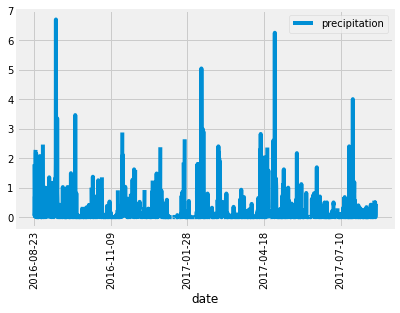

In [9]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])
# Sort the dataframe by date
df.sort_values('date').plot(x = 'date', y = 'precipitation', rot = 90)


In [10]:
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis


In [11]:
# total number of stations
print(f' The total number of stations is {session.query(Station.id).count()}')

 The total number of stations is 9


In [12]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and observation counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Which station id has the highest number of observations?
most_active_station = station_count[0][0]
print(f' The station with the highest number of observations is {most_active_station} with {station_count[0][1]} observations')

 The station with the highest number of observations is USC00519281 with 2772 observations


In [14]:
# Using the most active station id, calculate the lowest, highest, and average temperature.
print(f' The lowest, highest, and average temperature of station {most_active_station} is {session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()} respectively')



 The lowest, highest, and average temperature of station USC00519281 is [(54.0, 85.0, 71.66378066378067)] respectively


<AxesSubplot:title={'center':'TOBS for USC00519281 over the last 12 Months'}, ylabel='Frequency'>

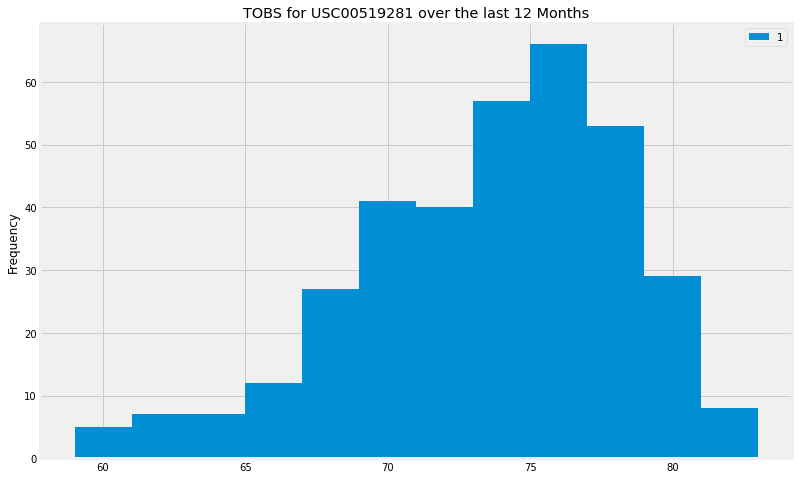

In [33]:
# Design a query to retrieve the last 12 months of temperature observation data (TOBS).
# Filter by the station with the highest number of observations.
results = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == most_active_station).filter(Measurement.date >= prev_year).all()
# Plot the results as a histogram with bins=12.
df = pd.DataFrame(results)
df.plot.hist(by='0', bins=12, figsize=(12,8), title = f'TOBS for {most_active_station} over the last 12 Months', xlabel = 'Temperature')
